# Data

https://en.wikipedia.org/wiki/Timeline_of_the_2019%E2%80%9320_Wuhan_coronavirus_outbreak




Model for the number of new cases ($y_t$) for each province on day $t$:
$$
\log(y_t) =  b_0 + b \cdot (t-t_0) + g * sin(2 \pi  a (t-t_0)) + \epsilon_t
$$

Assuming exponential growth at rate $b$, a sinesoid adjustment at rate $a$ (period $1/a$ days),   a temporal shift factor $t_0$, a baseline rate $b_0$, and a scaling factor $g$.


Given the limited time, I will use continuous errors after the log transform,  instead of modeling the counts.

In [41]:
d = read.table("cases_by_prov_20200201.csv", header = 0, skip=1,  sep=",")

In [42]:
header=read.table("cases_by_prov_20200201.csv", header = 0, skip=0,  sep=",")[1,]

In [43]:
d[ is.na(d) ] <- 0

In [44]:
d

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34
1/11/20,41,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1/12/20,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1/13/20,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1/14/20,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1/15/20,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1/16/20,4,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1/17/20,17,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1/18/20,59,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1/19/20,77,1,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1/20/20,72,13,5,2,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [45]:
## install.packages('lubridate')

In [46]:
library(lubridate)

In [47]:
d$days <- as.numeric( difftime( parse_date_time(d$V1, orders = c('mdy')), as.Date("2020-01-15"), units = "days") ) 
d <- d[d$days >= 0, ]

In [48]:
d$V1 <- as.Date( parse_date_time(d$V1, orders = c('mdy')) )

In [49]:
d

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V26,V27,V28,V29,V30,V31,V32,V33,V34,days
5,2020-01-15,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,2020-01-16,4,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1
7,2020-01-17,17,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2
8,2020-01-18,59,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,3
9,2020-01-19,77,1,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,4
10,2020-01-20,72,13,5,2,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,5
11,2020-01-21,105,12,5,7,5,2,5,2,1,⋯,0,0,0,0,0,0,0,0,0,6
12,2020-01-22,69,6,4,7,5,2,4,1,5,⋯,0,3,0,0,0,0,0,0,0,7
13,2020-01-23,105,21,12,4,33,1,18,4,3,⋯,4,2,2,2,1,0,0,0,0,8
14,2020-01-24,180,25,10,13,19,3,30,11,12,⋯,5,10,1,2,1,0,0,0,0,9


# Model

Fit model by solving the following optmization (starting with Hubei that has the longest history):

$$
\min_{b_0, b, t_0, a}  \frac{1}{T}\sum_{t\ge t_0} \| \log(y_t) -  b_0  -  b \cdot (t-t_0)   - g \cdot sin(2 \pi a (t-t_0))   \|^2
$$

We will search $t_0$ by trial and error.

In [50]:
# treat t0, idx as global
loss <- function(paras) {
    b0 = paras[1]
    b  = paras[2] 
    a  = paras[3]
    g = paras [4]
    tmp = d[d$days >= t0, ]
    y = tmp[,idx]
    t = tmp$days  
    T = length(y)
    ret = log(y + 1) - b0 - b*(t - t0) - g* sin(2*pi*a*(t-t0))
    sum( ret**2 )/T
}

loss_g <- function(paras) {
    b0 = paras[1]
    b  = paras[2] 
    a  = paras[3]
    g = paras[4]
    
    tmp = d[d$days >= t0, ]
    y = tmp[,idx]
    t = tmp$days  
    T = length(y)
    
    b0_grad =   -2*sum( log(y + 1) - b0 - b*(t - t0) - g*sin(2*pi*a*(t-t0)) )
    b_grad = 2*sum(    -(log(y + 1) - b0 - b*(t - t0) - g*sin(2*pi*a*(t-t0)))*(t-t0)      )
    a_grad = 2*sum(    -(log(y + 1) - b0 - b*(t - t0) - g*sin(2*pi*a*(t-t0)))*g*cos(2*pi*a*(t-t0) )*2*pi*(t-t0)    )
    g_grad = 2*sum(    -(log(y + 1) - b0 - b*(t - t0) - g*sin(2*pi*a*(t-t0)))*g*sin(2*pi*a*(t-t0) )     )
    c(b0_grad, b_grad, a_grad, g_grad)/T
}

get_y_t <- function(d, idx, t0) {
    tmp = d[d$days >= t0, ]
    y = tmp[,idx]
    t = tmp$days  
    list(y=log(y+1),  t=t, date=tmp[,1])
}

 

loss_pred <- function(paras, t) {
    b0 = paras[1]
    b  = paras[2] 
    a  = paras[3]
    g = paras[4]
    -(-b0 - b*(t - t0) - g*sin(2*pi*a*(t-t0))) 
}


# Hubei

In [51]:
idx = 2

random_init = 10

for (t0 in 0:5) {
    # re.model <- optim(c(0, 1, 1, 1), loss, loss_g, method = "BFGS")
    re.model <- optim(c(0, 0, 1, 1), loss)
    for (j in 1:random_init) {
        set.seed(100 + j)
        tmp <- optim(abs( rnorm(4) ), loss)
        if (tmp$value < re.model$value) re.model <- tmp
        tmp <- optim(abs( rnorm(4) ), loss, loss_g, method = "BFGS")
        if (tmp$value < re.model$value) re.model <- tmp
        
    }
#     re.model <- optim(c(0, 0, 1, 1), loss, loss_g, method = "L-BFGS-B")
    print(c(t0, re.model$value))
}


[1] 0.0000000 0.2893477
[1] 1.0000000 0.1270784
[1] 2.00000000 0.04394776
[1] 3.00000000 0.05773463
[1] 4.00000000 0.05574583
[1] 5.00000000 0.04822174


In [52]:
t0= 2
idx = 2
re.model <- optim(c(0, 0, 1, 1), loss)
for (j in 1:random_init) {
    set.seed(100 + j)
    tmp <- optim(abs( rnorm(4) ), loss)
    if (tmp$value < re.model$value) re.model <- tmp
    tmp <- optim(abs( rnorm(4) ), loss, loss_g, method = "BFGS")
    if (tmp$value < re.model$value) re.model <- tmp
}
re.model$t0 <- t0
re.model$idx <- idx
re.model

$par
[1] 3.1756450 0.3166547 0.1245695 0.4483501

$value
[1] 0.04394776

$counts
function gradient 
      49       17 

$convergence
[1] 0

$message
NULL

$t0
[1] 2

$idx
[1] 2

In [53]:
re.model.hubei <- re.model

In [54]:
library(ggplot2)
library(scales)

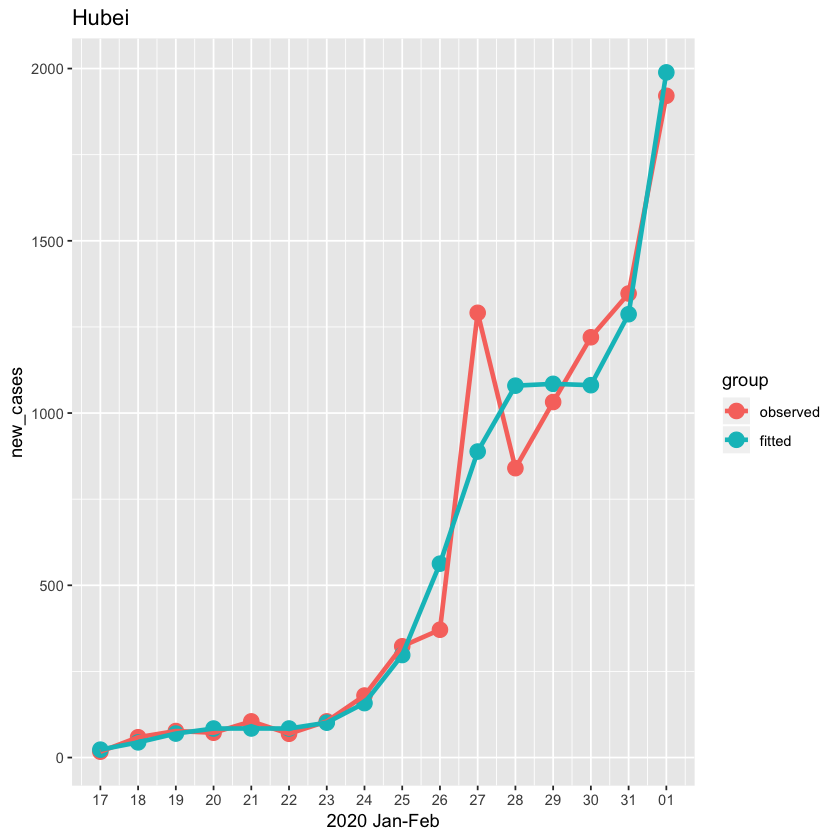

In [55]:
plot_fit <- function(mm, idx, t0) {

    ret <- get_y_t(d, idx, t0)
    prov.name <-  as.character( unlist( drop( header[idx] )  ) )
    plot.df <- rbind( data.frame( dates=ret$date, new_cases = exp(ret$y)-1,  group="observed"), 
                data.frame( dates=ret$date, new_cases = exp(loss_pred(mm$par, ret$t))-1 ,  group="fitted") )
    ggplot(plot.df, aes(x=dates, y=new_cases, colour=group, group=group) ) +
      geom_point(size=4) + 
      geom_line(size=1.3) + scale_x_date(date_breaks = "days", date_labels = "%d")   + ggtitle(prov.name) + labs(x="2020 Jan-Feb")   
}
t0 <- re.model.hubei$t0
idx <- re.model.hubei$idx
plot_fit(re.model.hubei, idx, t0)
ret <- get_y_t(d, idx, t0)

In [56]:
exp(loss_pred(re.model.hubei$par, ret$t+1))-1

[1]   44.08152   69.61891   84.21715   84.38025   84.30250  101.23580
 [7]  158.05504  297.62260  562.83235  888.24947 1079.48960 1084.77822
[13] 1080.89202 1286.91732 1988.88923 3723.62234

In [57]:
exp(loss_pred(re.model.hubei$par, max(ret$t)+1))-1

[1] 3723.622

In [58]:
1/re.model.hubei$par[3]

[1] 8.027649

The peak cycle is 8 days by the model.

# Other Provinces

Change the Province name below

In [59]:
re.mat <- matrix(0, 7, 2)
idx <- which(header == 'Guangdong')
for (t0 in 1:7) {
    # re.model <- optim(c(0, 1, 1, 1), loss, loss_g, method = "BFGS")
    re.model <- optim(c(0, 0, 1, 1), loss)
    for (j in 1:random_init) {
        set.seed(100 + j)
        tmp <- optim(abs( rnorm(4) ), loss)
        if (tmp$value < re.model$value) re.model <- tmp
        tmp <- optim(abs( rnorm(4) ), loss, loss_g, method = "BFGS")
        if (tmp$value < re.model$value) re.model <- tmp
        
    }
#     re.model <- optim(c(0, 0, 1, 1), loss, loss_g, method = "L-BFGS-B")
   # print(c(t0, re.model$value))
    re.mat[t0, ] <- c(t0, re.model$value)
}
re.mat

1,0.17754986
2,0.17246323
3,0.18688404
4,0.15537660
5,0.05582345
6,0.06339889
7,0.07245342


[1] 5

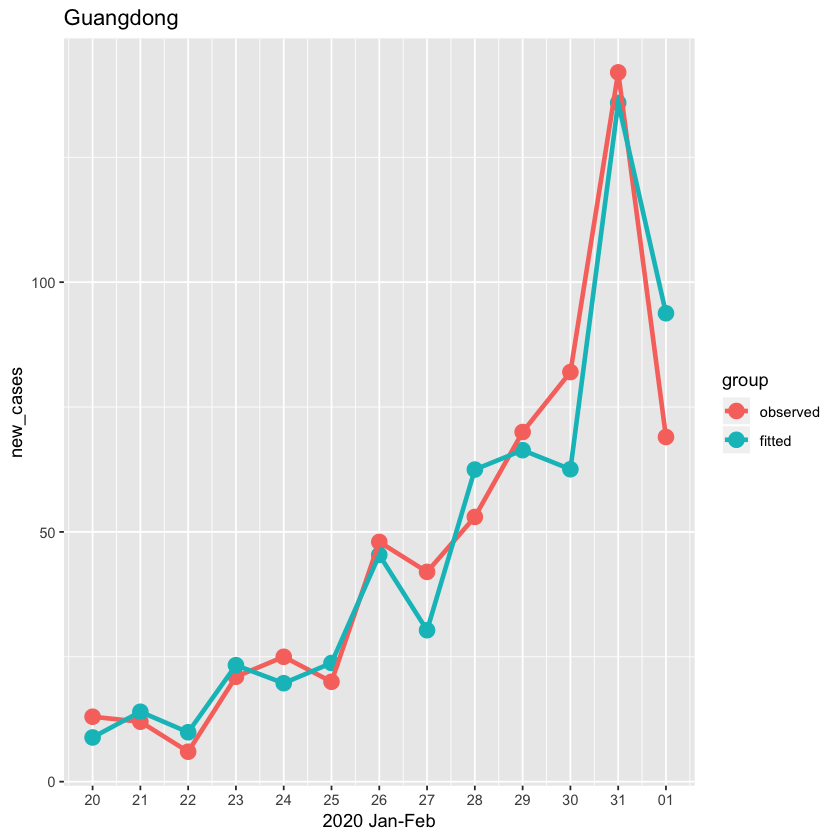

In [60]:
t0 <- which.min(re.mat[,2] )

re.model <- optim(c(0, 0, 1, 1), loss)
for (j in 1:random_init) {
    set.seed(100 + j)
    tmp <- optim(abs( rnorm(4) ), loss)
    if (tmp$value < re.model$value) re.model <- tmp
    tmp <- optim(abs( rnorm(4) ), loss, loss_g, method = "BFGS")
    if (tmp$value < re.model$value) re.model <- tmp
}



# t0 <- 7  # Sichuan = 7 due to insufficient data
plot_fit(re.model, idx, t0)
t0